In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows

In [4]:
path='/content/drive/MyDrive/DATA SET/BIKE DETAILS (1).csv'
df=pd.read_csv(path)

In [5]:
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


Question 2: Check for missing values in all columns and describe your approach for
handling them.


*   List item
*   List item



In [6]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [7]:
df.shape

(1061, 7)

as we can see the missing value in the data set in EX_SHOWROOM_PRICE we can take 2 approch,can take the mean value or can fill the missing values with the median also,but for the best result we can group the bike on thee basis of company,year.



Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend

Text(0.5, 1.0, 'Distribution of Selling Prices')

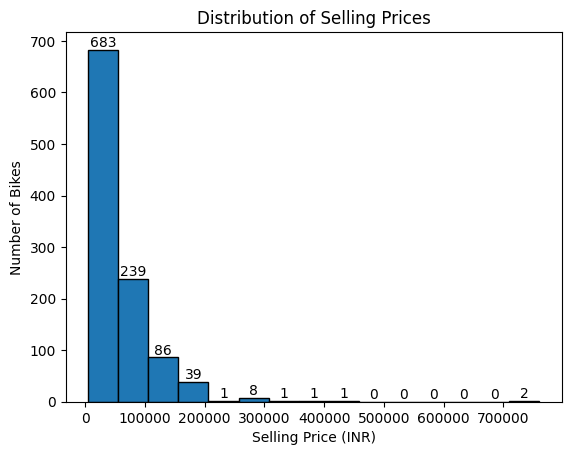

In [8]:

hist,bin=np.histogram(df.selling_price,bins=15)
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df.selling_price, bins=bin, edgecolor='black')


for i in range(len(hist)):
    bar_center = (bin[i] + bin[i+1]) / 2
    ax.text(bar_center, hist[i], str(hist[i]), ha='center', va='bottom')
ax.set_xlabel('Selling Price (INR)')
ax.set_ylabel('Number of Bikes')
ax.set_title('Distribution of Selling Prices')



Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation

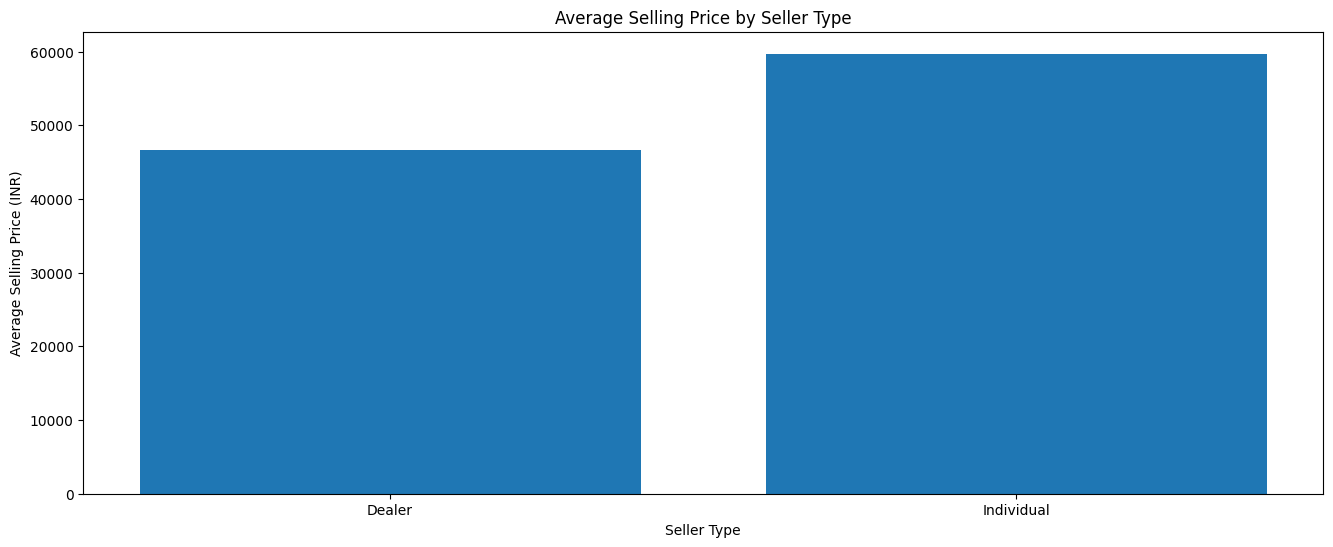

In [9]:
data = df.groupby('seller_type')['selling_price'].mean().reset_index()
plt.figure(figsize=(16,6))
plt.bar(data['seller_type'], data['selling_price'])
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price (INR)')
plt.title('Average Selling Price by Seller Type')
plt.show()

Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.


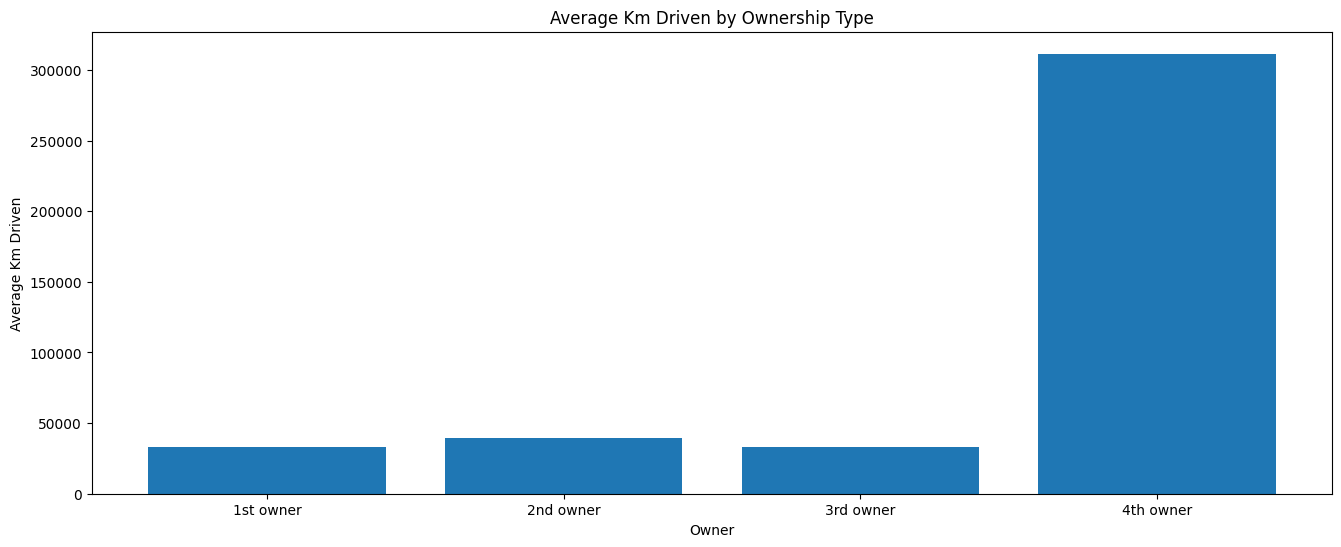

In [10]:
data = df.groupby('owner')['km_driven'].mean().reset_index()
plt.figure(figsize=(16,6))
plt.bar(data['owner'], data['km_driven'])
plt.xlabel('Owner')
plt.ylabel('Average Km Driven')
plt.title('Average Km Driven by Ownership Type')

plt.show()

<Axes: xlabel='owner', ylabel='km_driven'>

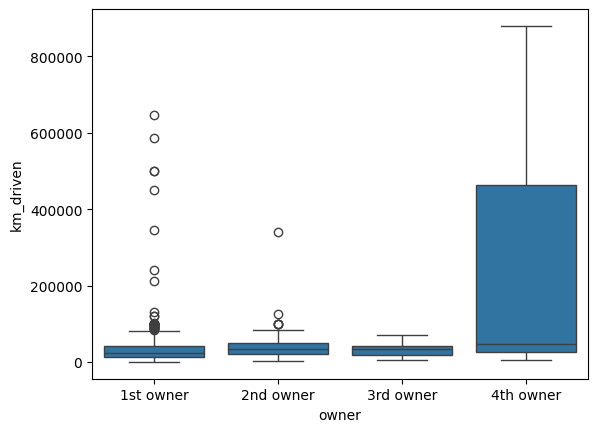

In [11]:
sns.boxplot(x=df.owner,y=df.km_driven)

Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.

In [12]:
q1,q3=df.km_driven.quantile([0.25,0.75])
IQR=q3-q1
lower_band=q1-1.5*IQR
upper_band=q3+1.5*IQR
new_km_driven=[]
for i in range (len(df.km_driven)):
  if df.km_driven[i] >= lower_band and df.km_driven[i] <= upper_band:
        new_km_driven.append(df.km_driven[i])

Text(0.5, 1.0, 'After Outlier Removal')

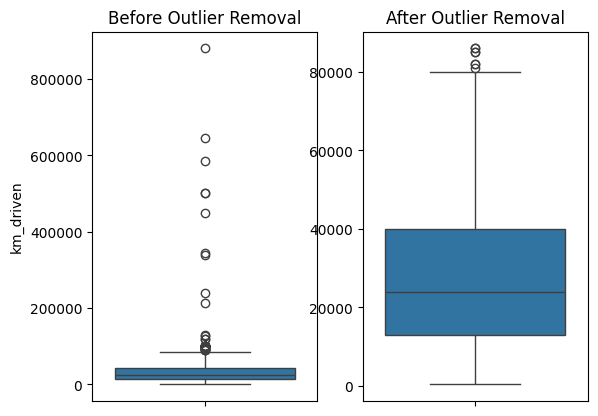

In [13]:
plt.subplot(1, 2, 1)
sns.boxplot(y=df.km_driven)
plt.title('Before Outlier Removal')


plt.subplot(1, 2, 2)
sns.boxplot(y=new_km_driven)
plt.title('After Outlier Removal')


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.
(Include your Python code and output in the code box below.)

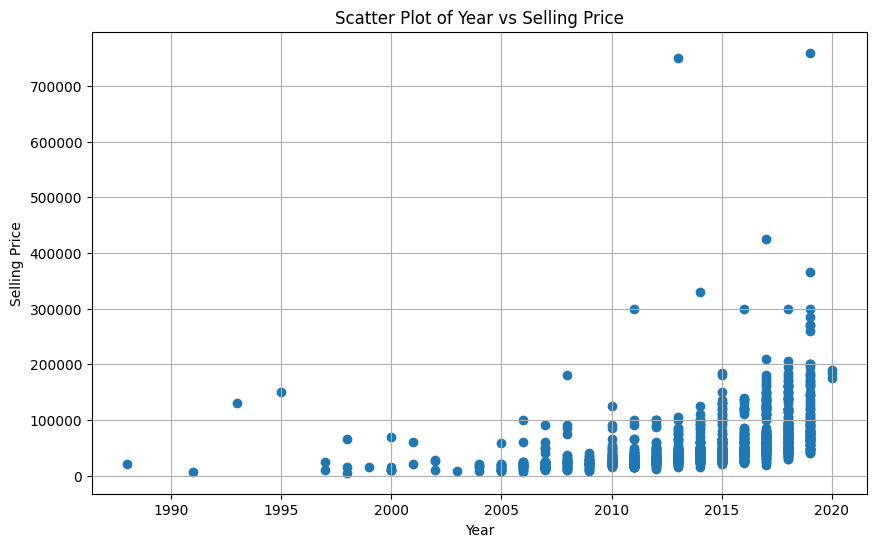

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df.year, df.selling_price)
plt.title('Scatter Plot of Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.


In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded=encoder.fit_transform(df[['seller_type']])
encoded_df=pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out(['seller_type']))
print(encoded_df.head(10))

   seller_type_Dealer  seller_type_Individual
0                 0.0                     1.0
1                 0.0                     1.0
2                 0.0                     1.0
3                 0.0                     1.0
4                 0.0                     1.0
5                 0.0                     1.0
6                 0.0                     1.0
7                 0.0                     1.0
8                 0.0                     1.0
9                 0.0                     1.0


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?
(Include your Python code and output in the code box below.)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [17]:
num_cols=[cols for cols in df.columns if df[cols].dtype!='O']

In [18]:
corr=df[num_cols].corr()

<Axes: >

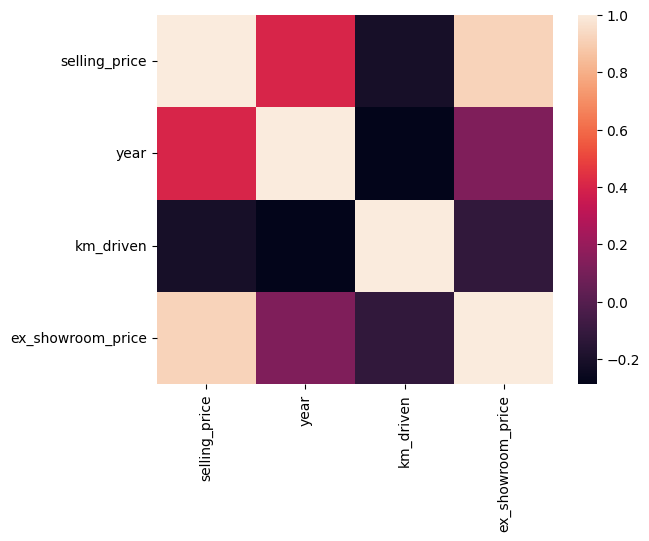

In [22]:
sns.heatmap(corr)

Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.


after working on the data set if figure out that the selling price of the bike depends upon the manifacturing unit.